In [1]:
import pandas as pd
import numpy as np

In [23]:
train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv', index_col=[0])
test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv', index_col=[0])

In [24]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [25]:
def convert_age_to_label(age_str):
    if age_str == '< 1 Year':
        return 0
    elif age_str == '1-2 Year':
        return 1
    elif age_str == '> 2 Years':
        return 2
    
    return None

In [26]:
train['Vehicle_Age'] = train['Vehicle_Age'].apply(convert_age_to_label)
test['Vehicle_Age'] = train['Vehicle_Age'].apply(convert_age_to_label)

In [27]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
def convert_gender_to_label(gender_str):
    if gender_str == 'Male':
        return 0
    elif gender_str == 'Female':
        return 1
    
    return None

In [29]:
train['Gender'] = train['Gender'].apply(convert_gender_to_label)
test['Gender'] = test['Gender'].apply(convert_gender_to_label)

In [30]:
train['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
def convert_damage_to_label(damage_str):
    if damage_str == 'Yes':
        return 1
    elif damage_str == 'No':
        return 0
    
    return None

In [32]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].apply(convert_damage_to_label)
test['Vehicle_Damage'] = test['Vehicle_Damage'].apply(convert_damage_to_label)

In [33]:
train.corr()['Response']

Gender                 -0.055212
Age                     0.122134
Driving_License         0.009197
Region_Code             0.012816
Previously_Insured     -0.345930
Vehicle_Age             0.231029
Vehicle_Damage          0.359780
Annual_Premium          0.032261
Policy_Sales_Channel   -0.152733
Vintage                -0.015177
Response                1.000000
Name: Response, dtype: float64

In [35]:
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=px.imshow(train.corr(),text_auto=True, template='plotly_dark', color_continuous_scale=px.colors.sequential.Blues, aspect='auto',title='<b>Correlation matrix')
fig.update_layout(title_x=0.5)
fig.show()

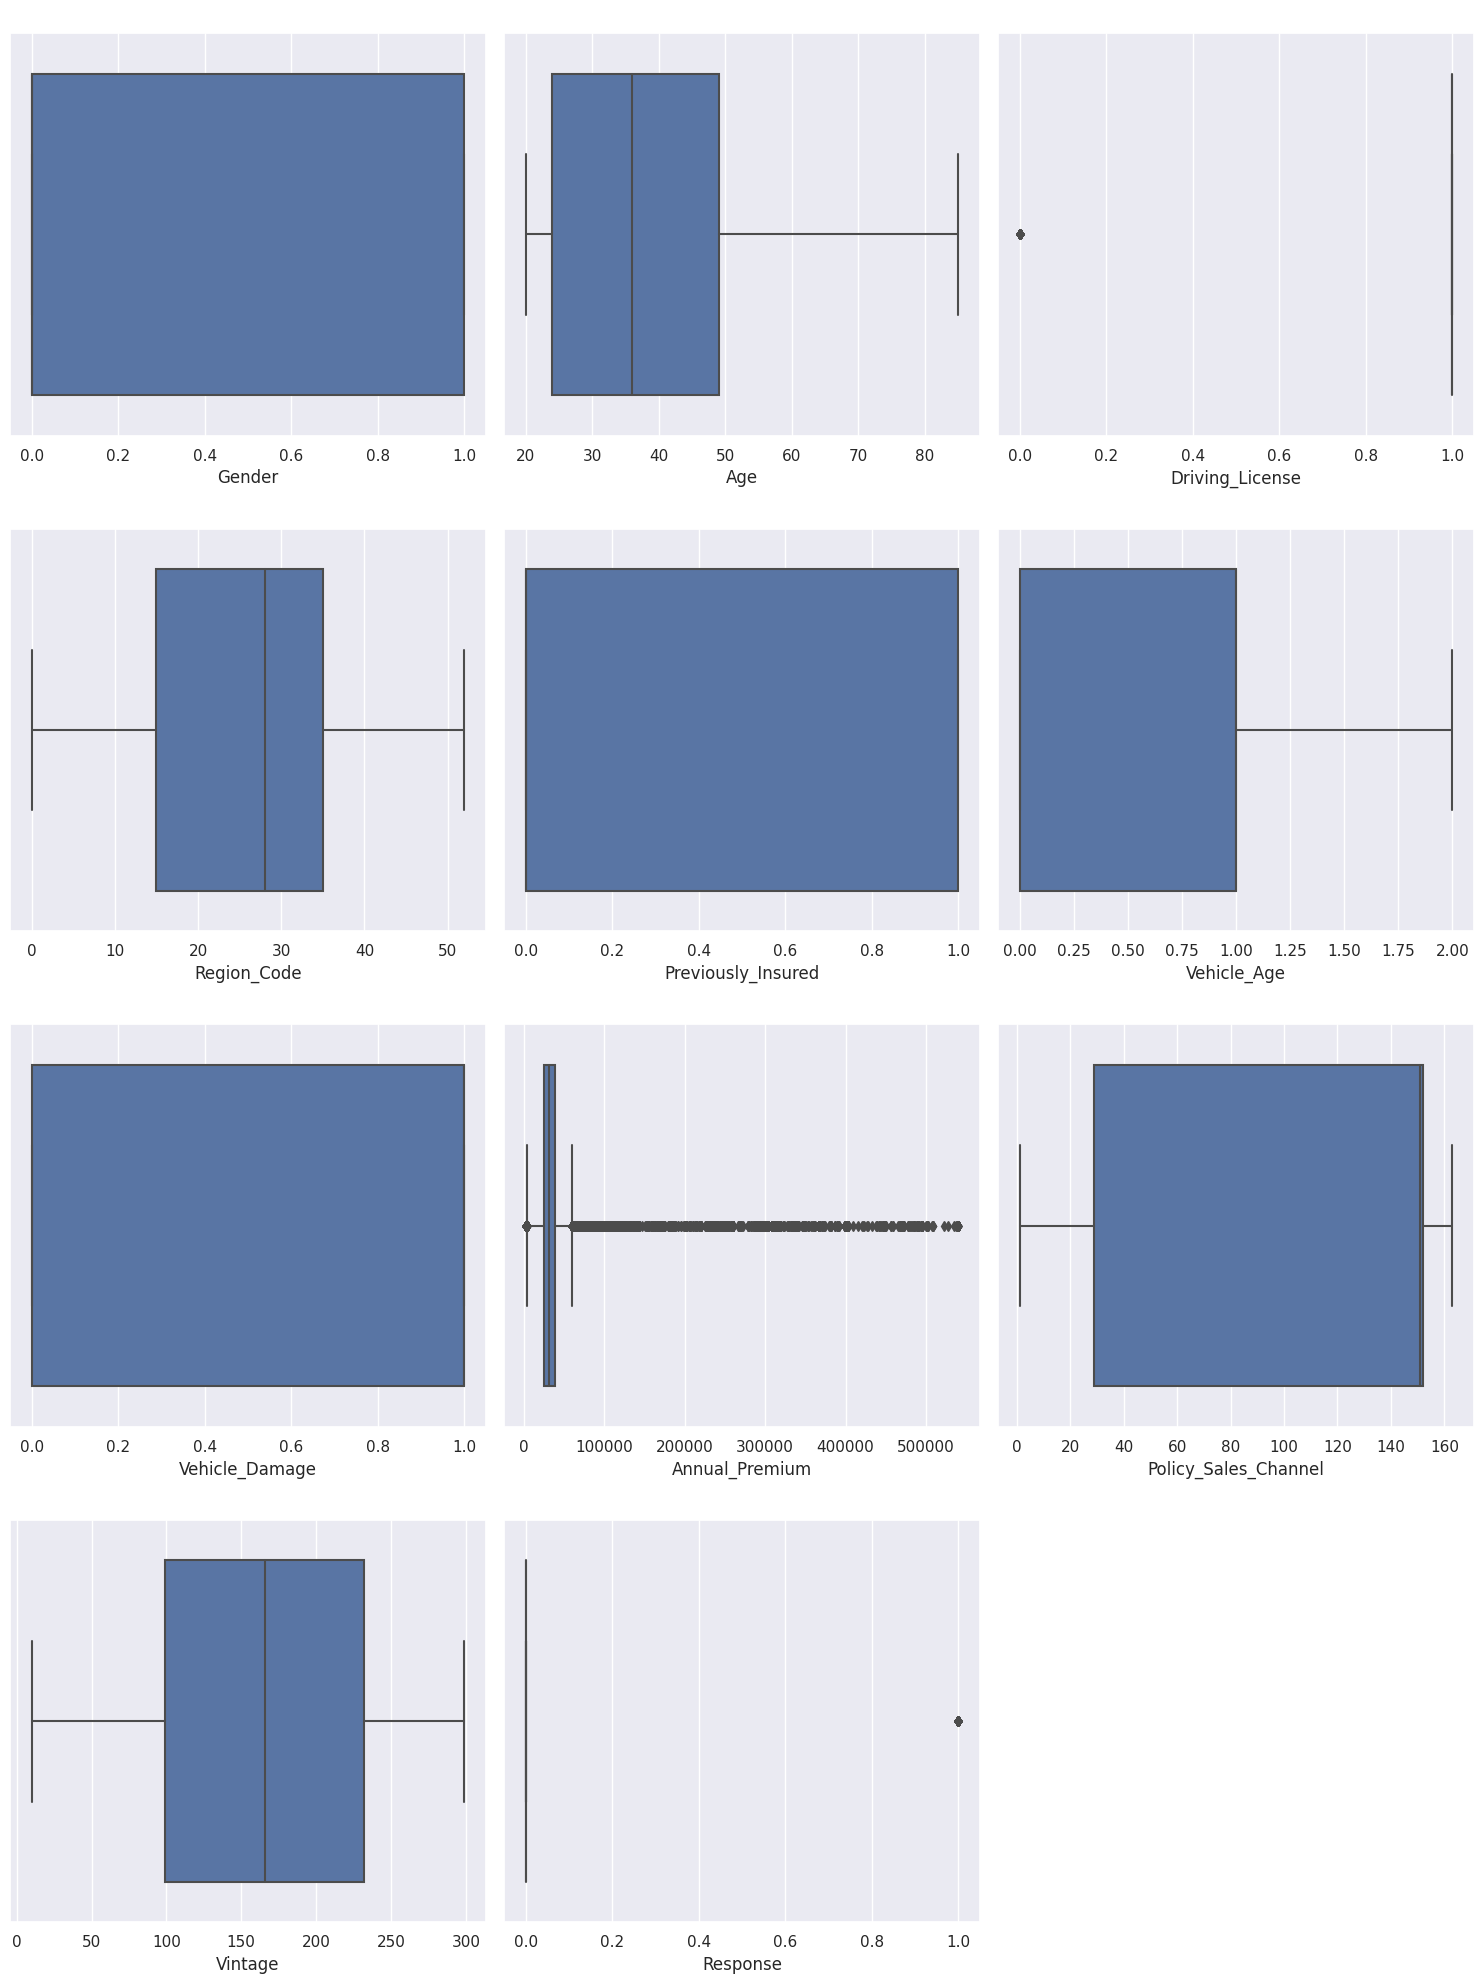

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

sns.set(style="darkgrid")

columns_to_plot = [
    'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
    'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
    'Vintage', 'Response'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=train[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=14, color='white')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

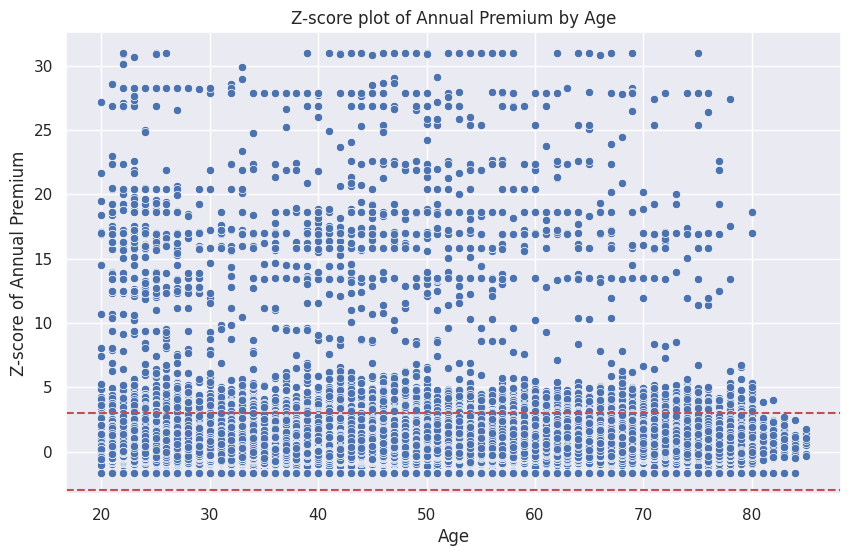

In [40]:
from scipy import stats
import numpy as np


train['Annual_Premium_Z'] = stats.zscore(train['Annual_Premium'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Age', y='Annual_Premium_Z')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Z-score plot of Annual Premium by Age')
plt.xlabel('Age')
plt.ylabel('Z-score of Annual Premium')
plt.show()

In [41]:
train = train.drop(columns=['Annual_Premium_Z'])

In [42]:
train.to_csv('train_cleaned_1.csv', index=False)
test.to_csv('test_cleaned_1.csv', index=False)